In [68]:
!pip install gradio

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub

In [106]:
TF_MODEL_URL="https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1"
LABEL_MAP_URL="https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv"
IMAGE_SHAPE=(321,321)

In [107]:
classifier = tf.keras.Sequential([hub.KerasLayer(TF_MODEL_URL,
                                                 input_shape=IMAGE_SHAPE+(3,),
                                                 output_key="predictions:logits")])

In [108]:
df=pd.read_csv(LABEL_MAP_URL)

In [109]:
df.head(3)

,id,name
0,0,Bagha Shahi Mosque
1,1,City Palace
2,2,The Immaculate Conception Cathedral of Cubao


In [74]:
label_map=dict(zip(df.id,df.name))

In [75]:
label_map

{0: 'Bagha Shahi Mosque',
 1: 'City Palace',
 2: 'The Immaculate Conception Cathedral of Cubao',
 3: 'City of David',
 4: 'Noor Mahal',
 5: 'City of David',
 6: 'Shree Muktinath Temple, Nepal',
 7: 'Shivpuri Nagarjun National Park',
 8: 'Nankin-machi',
 9: 'Khao Sok National Park',
 10: 'Mt. Goryu',
 11: 'Milk Grotto Church',
 12: 'Gili Trawangan',
 13: 'Htukkant Thein Temple',
 14: 'Yabakei Dam',
 15: 'St. Francis of Assisi Parish Church',
 16: 'Saint Hripsime Church',
 17: 'Ranipuram',
 18: "St. Joseph's Church, Beijing",
 19: 'Tower of David',
 20: 'Sandiaojiao Lighthouse',
 21: 'Ngong Ping 360',
 22: 'Chhatrapati Shivaji Terminus',
 23: 'Sea of Galilee',
 24: 'Khor Virab',
 25: 'Shanti Stupa',
 26: 'Sevanavank',
 27: 'Izmenchivoye',
 28: 'מצפה גדות',
 29: 'Autumn-Admiring Pavilion',
 30: 'Lohagad Fort',
 31: "Humble Administrator's Garden",
 32: 'Tiananmen Square',
 33: 'Sree Thanumalayan Temple',
 34: 'Menara Kuala Lumpur',
 35: 'Lok Virsa Heritage Museum',
 36: 'Batu Caves',
 37:

In [110]:
img_loc = "Image.jpg"

In [111]:
img = Image.open(img_loc).resize(IMAGE_SHAPE)

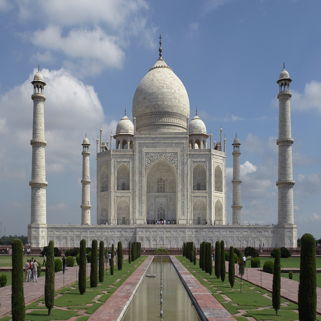

In [112]:
img

In [113]:
img = np.array(img)/255.0
img.shape

(321, 321, 3)

In [114]:
img = img[np.newaxis, ...]

In [115]:
img.shape

(1, 321, 321, 3)

In [116]:
result = classifier.predict(img)

1/1 [==============================] - 2s 2s/step


In [117]:
result

array([[ 0.23341599,  0.24414389, -0.08384595, ..., -0.02063631,
         0.11284583,  0.13042708]], dtype=float32)

In [118]:
label_map[np.argmax(result)]

'Taj Mahal'

In [119]:
class_names=list(label_map.values())

In [120]:
def classify_img(image):
  img =np.array(image)/255.0
  img=img[np.newaxis,...]
  prediction=classifier.predict(img)
  return label_map[np.argmax(prediction)]

In [ ]:
image = gr.components.Image(height=321, width=321)
label = gr.components.Label(num_top_classes=1)

gr.Interface(
    fn=classify_img,
    inputs=image,
    outputs=label,
).launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://824504c7ee793bdb90.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 2s 2s/step
